In [1]:
# Import Tensorflow 2.0
import tensorflow as tf

# MIT introduction to deep learning package
import mitdeeplearning as mdl

# other packages
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

2024-07-26 15:58:28.169487: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/trannhi/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
import comet_ml
# TODO: ENTER YOUR API KEY HERE!!
COMET_API_KEY = ""

In [ ]:
# start a first comet experiment for the first part of the lab
comet_ml.init(project_name="6S191lab2_part1_NN")
comet_model_1 = comet_ml.Experiment()

In [14]:
mnist = tf.keras.datasets.mnist
# load the training and testing images and labels from the mnist dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)
# np.expand_dims(train_images, axis=-1) will add the channel dimension to train_images, then / 255.0 will generate pixel values
# in [0,1]
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
print(train_images.shape)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28, 1)


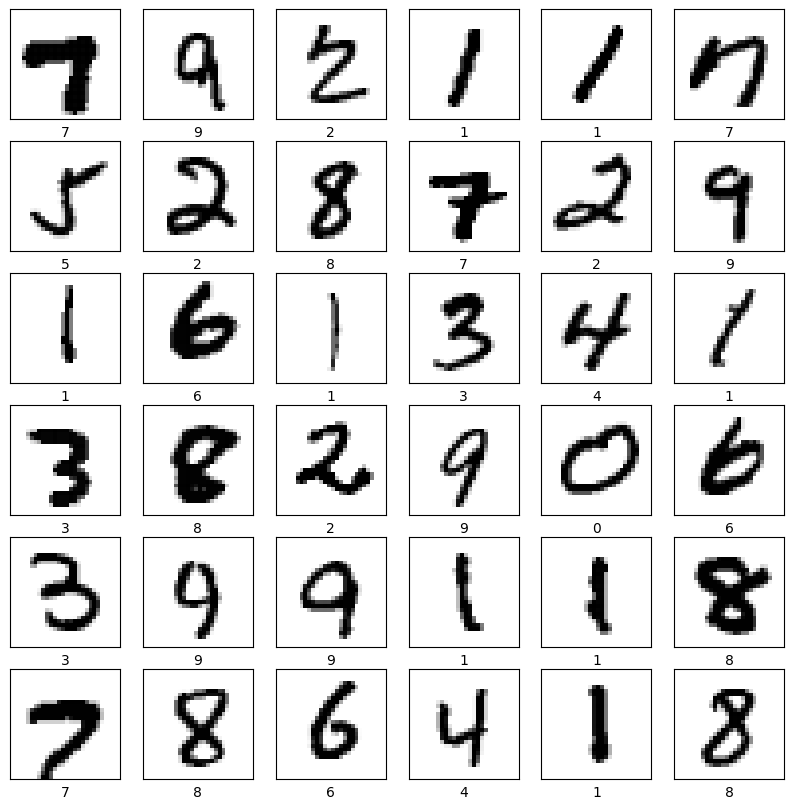

In [9]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])
# comet_model_1.log_figure(figure=plt)

In [15]:
def build_fc_model():
  fc_model = tf.keras.Sequential([
      # First define a Flatten layer
      tf.keras.layers.Flatten(),

      # '''TODO: Define the activation function for the first fully connected (Dense) layer.'''
      tf.keras.layers.Dense(128, activation='relu'),

      # '''TODO: Define the second Dense layer to output the classification probabilities'''
      tf.keras.layers.Dense(10, activation='softmax')

  ])
  return fc_model

model = build_fc_model()

In [16]:
# metrics used to monitor the training and testing steps. In this example, 
# we'll look at the accuracy, the fraction of the images that are correctly classified.
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# Define the batch size and the number of epochs to use during training
BATCH_SIZE = 64
EPOCHS = 5

model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
# comet_model_1.end()

Epoch 1/5
938/938 [==============================] - 4s 3ms/step - loss: 0.3716 - accuracy: 0.8963
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.2021 - accuracy: 0.9421
Epoch 3/5
938/938 [==============================] - 2s 3ms/step - loss: 0.1527 - accuracy: 0.9561
Epoch 4/5
938/938 [==============================] - 2s 3ms/step - loss: 0.1240 - accuracy: 0.9650
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1045 - accuracy: 0.9708


In [19]:
'''TODO: Use the evaluate method to test the model!'''
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1053 - accuracy: 0.9684
Test accuracy: 0.9684000015258789


In [26]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([

        # TODO: Define the first convolutional layer
        tf.keras.layers.Conv2D(24, kernel_size=(3,3), activation='relu'),

        # TODO: Define the first max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),

        # TODO: Define the second convolutional layer
        tf.keras.layers.Conv2D(36, kernel_size=(3,3), activation='relu'),

        # TODO: Define the second max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # TODO: Define the last Dense layer to output the classification
        # probabilities. Pay attention to the activation needed a probability
        # output
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

    return cnn_model

cnn_model = build_cnn_model()
# Initialize the model by passing some data through
cnn_model.predict(train_images[[0]])
# Print the summary of the layers in the model.
print(cnn_model.summary())

1/1 [==============================] - 0s 162ms/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 24)        240       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 24)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 36)        7812      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 5, 5, 36)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 900)               0         
                                                                 
 

In [28]:
#comet_ml.init(project_name="6.s191lab2_part1_CNN")
#comet_model_2 = comet_ml.Experiment()

'''TODO: Define the compile operation with your optimizer and learning rate of choice'''
cnn_model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=1e-2), loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

In [29]:
'''TODO: Use model.fit to train the CNN model, with the same batch_size and number of epochs previously used.'''
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
# comet_model_2.end() ## uncomment this line to end the comet experiment

Epoch 1/5
938/938 [==============================] - 28s 29ms/step - loss: 0.1305 - accuracy: 0.9597
Epoch 2/5
938/938 [==============================] - 25s 27ms/step - loss: 0.0620 - accuracy: 0.9815
Epoch 3/5
938/938 [==============================] - 26s 28ms/step - loss: 0.0513 - accuracy: 0.9851
Epoch 4/5
938/938 [==============================] - 27s 28ms/step - loss: 0.0484 - accuracy: 0.9859
Epoch 5/5
938/938 [==============================] - 27s 28ms/step - loss: 0.0431 - accuracy: 0.9874


In [31]:
'''TODO: Use the evaluate method to test the model!'''
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0657 - accuracy: 0.9858
Test accuracy: 0.98580002784729


In [32]:
predictions = cnn_model.predict(test_images)

313/313 [==============================] - 2s 5ms/step


In [33]:
predictions[0]

array([2.60833843e-15, 2.85509802e-08, 1.99430880e-12, 1.09897369e-09,
       1.05193874e-10, 2.78406313e-13, 1.05584912e-20, 9.99999881e-01,
       8.61570797e-08, 2.18591611e-09], dtype=float32)

In [34]:
'''TODO: identify the digit with the highest confidence prediction for the first
    image in the test dataset. '''
prediction = np.argmax(predictions[0])

print(prediction)

7


Label of this digit is: 7


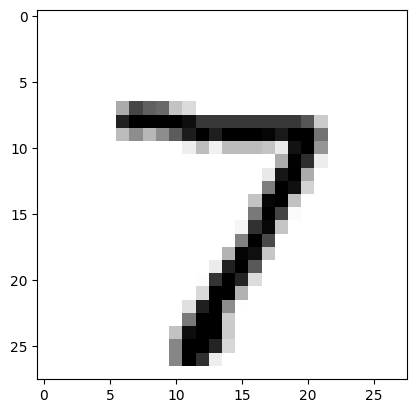

In [35]:
print("Label of this digit is:", test_labels[0])
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)
#comet_model_2.log_figure(figure=plt)

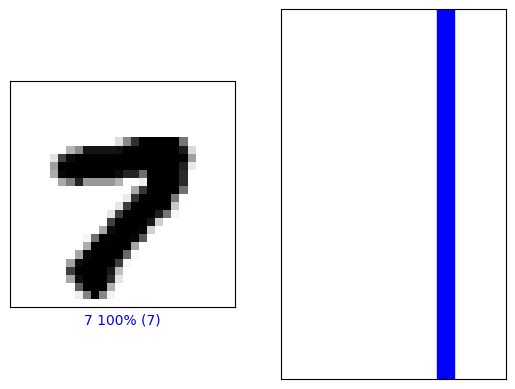

In [40]:
#@title Change the slider to look at the model's predictions! { run: "auto" }

image_index = 79 #@param {type:"slider", min:0, max:100, step:1}
plt.subplot(1,2,1)
mdl.lab2.plot_image_prediction(image_index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
mdl.lab2.plot_value_prediction(image_index, predictions,  test_labels)
#comet_model_2.log_figure(figure=plt)

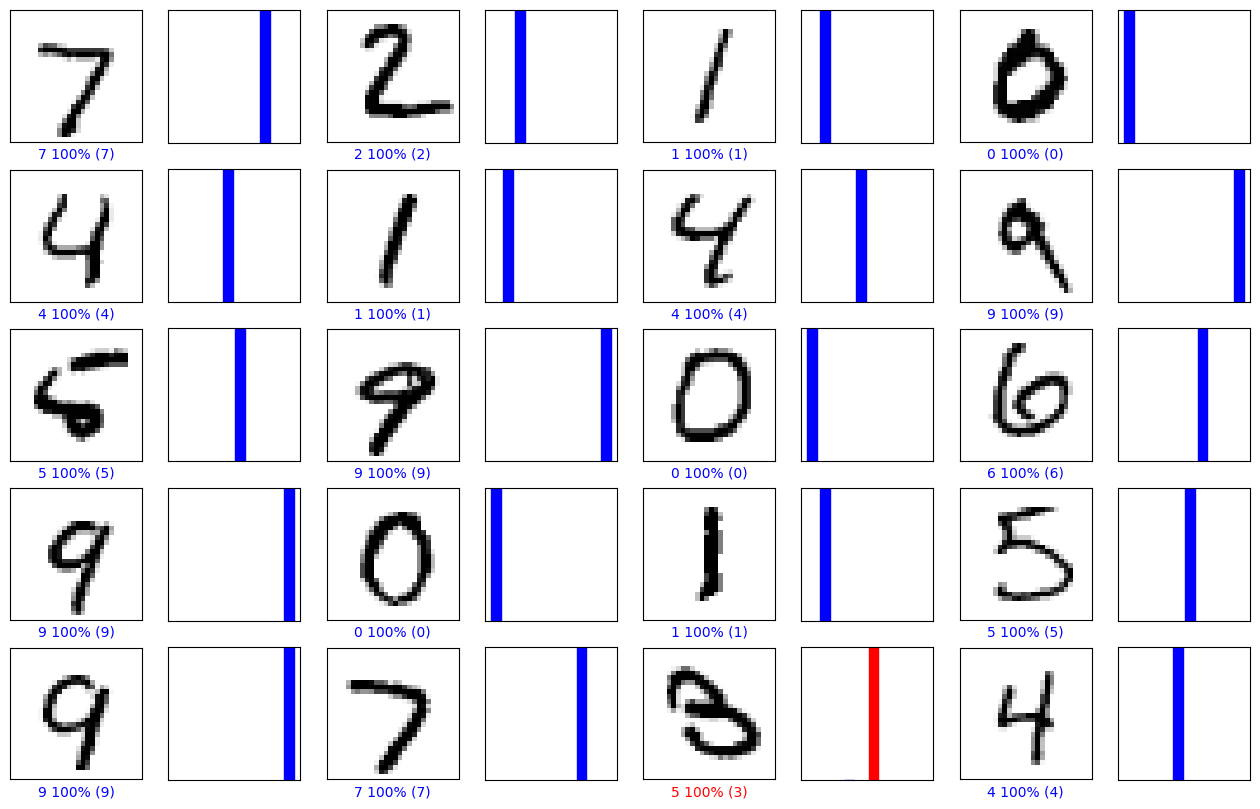

In [42]:
# Plots the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  mdl.lab2.plot_image_prediction(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  mdl.lab2.plot_value_prediction(i, predictions, test_labels)
#comet_model_2.log_figure(figure=plt)
#comet_model_2.end()

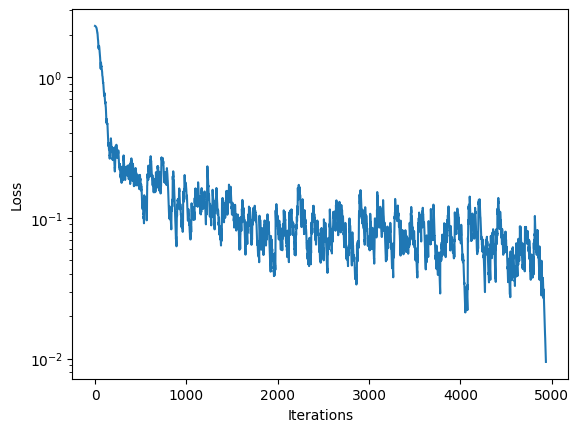

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [02:54<00:00, 28.72it/s]


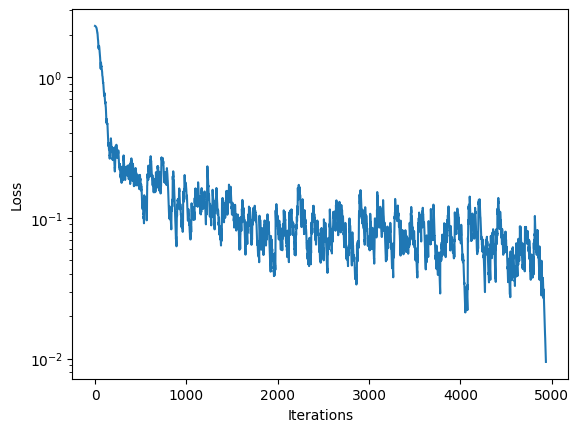

In [43]:
# Rebuild the CNN model
cnn_model = build_cnn_model()

batch_size = 12
loss_history = mdl.util.LossHistory(smoothing_factor=0.95) # to record the evolution of the loss
plotter = mdl.util.PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Loss', scale='semilogy')
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2) # define our optimizer

#comet_ml.init(project_name="6.s191lab2_part1_CNN2")
#comet_model_3 = comet_ml.Experiment()

if hasattr(tqdm, '_instances'): tqdm._instances.clear() # clear if it exists

for idx in tqdm(range(0, train_images.shape[0], batch_size)):
  # First grab a batch of training data and convert the input images to tensors
  (images, labels) = (train_images[idx:idx+batch_size], train_labels[idx:idx+batch_size])
  images = tf.convert_to_tensor(images, dtype=tf.float32)

  # GradientTape to record differentiation operations
  with tf.GradientTape() as tape:
    #'''TODO: feed the images into the model and obtain the predictions'''
    logits = cnn_model(images)

    #'''TODO: compute the categorical cross entropy loss
    loss_value = tf.keras.backend.sparse_categorical_crossentropy(labels, logits) # TODO

    # log the loss to comet
    #comet_model_3.log_metric("loss", loss_value.numpy().mean(), step=idx)

  loss_history.append(loss_value.numpy().mean()) # append the loss to the loss_history record
  plotter.plot(loss_history.get())

  # Backpropagation
  '''TODO: Use the tape to compute the gradient against all parameters in the CNN model.
      Use cnn_model.trainable_variables to access these parameters.'''
  grads = tape.gradient(loss_value, cnn_model.trainable_variables)
  optimizer.apply_gradients(zip(grads, cnn_model.trainable_variables))

#comet_model_3.log_figure(figure=plt)
#comet_model_3.end()